In [349]:
import pandas as pd
import numpy as np
from lifetimes.utils import summary_data_from_transaction_data
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [350]:
df = pd.read_csv('OnlineRetail.csv',on_bad_lines='skip', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Most important features are 
Quantity,UnitPrice   for monetary   
InvoiceDate   for frequency   
CustomerID   for segmentation   

In [351]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [352]:
df.drop(columns=['Description','StockCode'],inplace=True)

In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   Quantity     541909 non-null  int64  
 2   InvoiceDate  541909 non-null  object 
 3   UnitPrice    541909 non-null  float64
 4   CustomerID   406829 non-null  float64
 5   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 24.8+ MB


<Axes: >

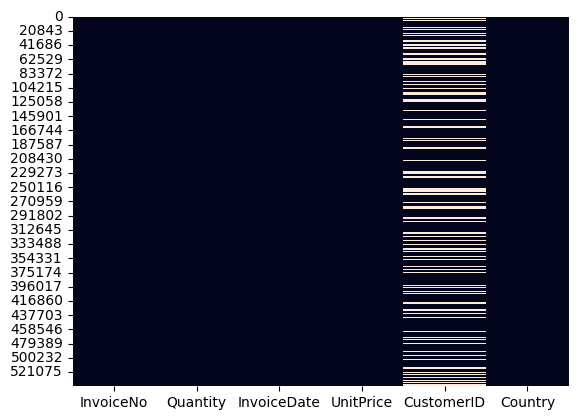

In [354]:
sns.heatmap(df.isnull(),cbar=False)

In [355]:
df.dropna(inplace=True) # the nulls values only in CustomerID so no solutions rather than drop it 

In [356]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [357]:
df = df[df['Quantity']>0]
df = df[df['UnitPrice']>0]

<Axes: xlabel='UnitPrice', ylabel='Quantity'>

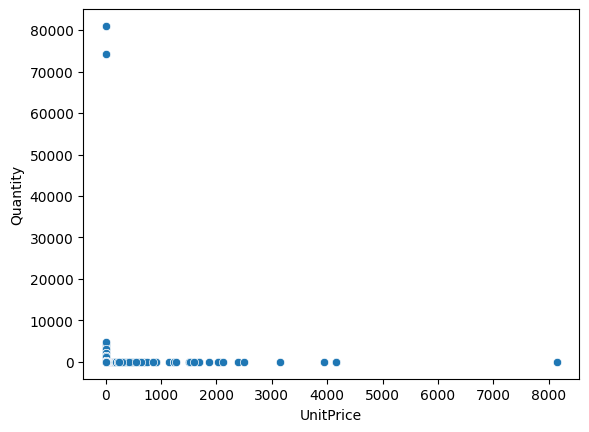

In [358]:
sns.scatterplot(x=df['UnitPrice'],y=df['Quantity'])

In [359]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [360]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [361]:
invoice_summary = df.groupby('InvoiceNo').agg({
    'CustomerID': 'first',          
    'InvoiceDate': 'first' , 
    'TotalPrice': 'sum' ,
    'Country' :'first',         
}).reset_index()
invoice_summary.head()

,InvoiceNo,CustomerID,InvoiceDate,TotalPrice,Country
0,536365,17850.0,2010-12-01 08:26:00,139.12,United Kingdom
1,536366,17850.0,2010-12-01 08:28:00,22.20,United Kingdom
2,536367,13047.0,2010-12-01 08:34:00,278.73,United Kingdom
3,536368,13047.0,2010-12-01 08:34:00,70.05,United Kingdom
4,536369,13047.0,2010-12-01 08:35:00,17.85,United Kingdom


In [362]:
top_10=invoice_summary['Country'].value_counts(sort=True).head(10)

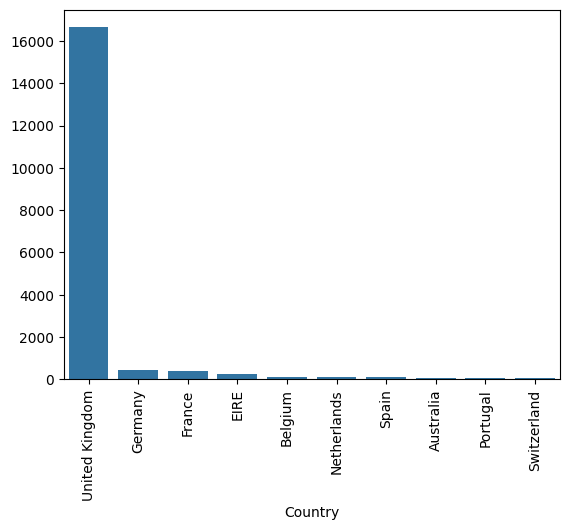

In [363]:
sns.barplot(x=top_10.index,y=top_10.values)
plt.xticks(rotation=90)
plt.show()

In [364]:
United_Kingdom = invoice_summary[invoice_summary['Country']=='United Kingdom']

In [365]:
United_Kingdom.describe()

,CustomerID,InvoiceDate,TotalPrice
count,16646.000000,16646,16646.000000
mean,15507.717890,2011-07-01 02:44:58.882614528,439.047913
min,12346.000000,2010-12-01 08:26:00,0.380000
25%,14098.250000,2011-03-30 13:17:00,152.955000
50%,15498.000000,2011-07-11 14:40:00,299.565000
75%,16923.000000,2011-10-12 12:56:15,444.405000
max,18287.000000,2011-12-09 12:49:00,168469.600000
std,1626.191207,NaN,1663.492222


In [366]:
United_Kingdom['TotalPrice'].idxmax()

np.int64(18499)

In [367]:
United_Kingdom.shape

(16646, 5)

In [368]:
RFM=summary_data_from_transaction_data(United_Kingdom,'CustomerID', 'InvoiceDate',monetary_value_col='TotalPrice')
RFM.head()

,frequency,recency,T,monetary_value
CustomerID,,,,
12346.0,0.0,0.0,325.0,0.000000
12747.0,10.0,367.0,369.0,383.745000
12748.0,112.0,373.0,373.0,301.024821
12749.0,3.0,210.0,213.0,1077.260000
12820.0,3.0,323.0,326.0,257.293333


In [369]:
RFM=RFM.reset_index()

In [370]:
RFM.describe()

,CustomerID,frequency,recency,T,monetary_value
count,3920.000000,3920.000000,3920.000000,3920.000000,3920.000000
mean,15562.059694,2.850000,131.343622,223.085714,293.099532
std,1576.594671,5.713358,132.443948,118.037855,2734.951972
min,12346.000000,0.000000,0.000000,1.000000,0.000000
25%,14208.750000,0.000000,0.000000,112.000000,0.000000
50%,15569.500000,1.000000,94.000000,249.000000,173.625000
75%,16913.250000,3.000000,252.000000,327.000000,347.946042
max,18287.000000,112.000000,373.000000,373.000000,168469.600000


In [371]:
RFM[(RFM['monetary_value']==168469.600000)] # rare case one time huge amount of money

,CustomerID,frequency,recency,T,monetary_value
2598,16446.0,1.0,205.0,205.0,168469.6


In [372]:
RFM=RFM[~(RFM['monetary_value']==168469.600000)]

In [373]:
RFM=RFM[RFM['monetary_value']>0]

<Axes: ylabel='monetary_value'>

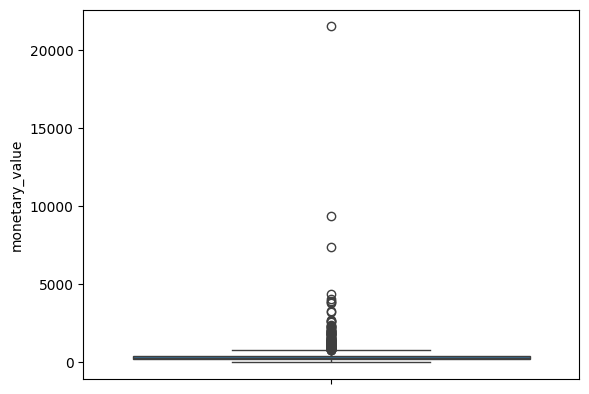

In [374]:
sns.boxplot(RFM['monetary_value'])

<Axes: xlabel='frequency', ylabel='Count'>

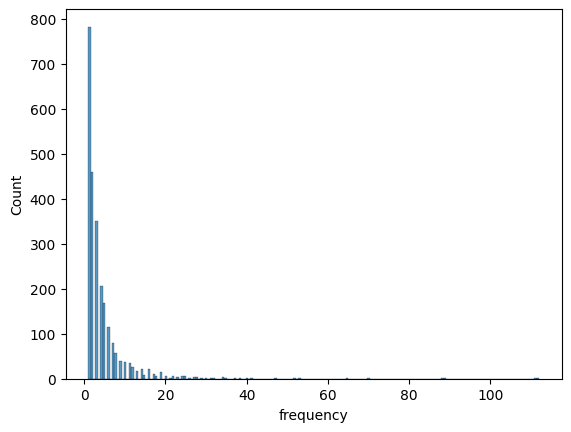

In [375]:
sns.histplot(RFM['frequency'])

<Axes: xlabel='T', ylabel='Count'>

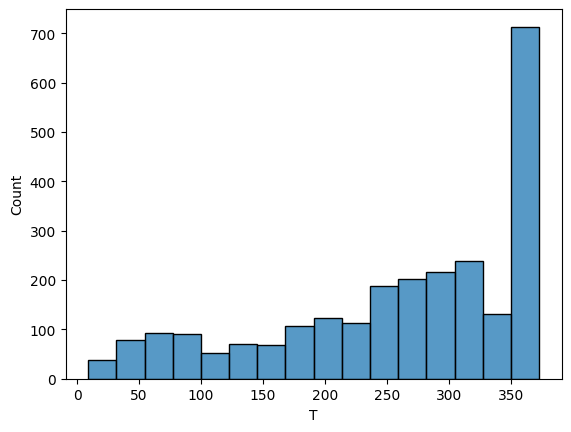

In [376]:
sns.histplot(RFM['T'])

<Axes: >

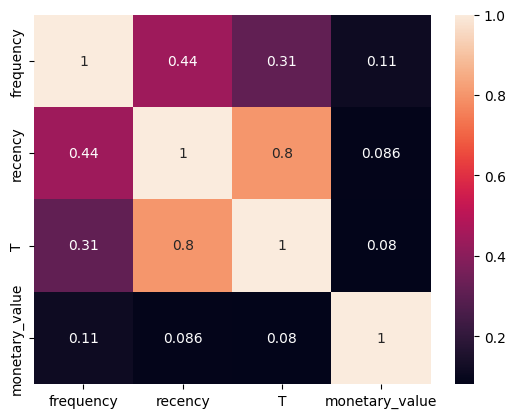

In [377]:
sns.heatmap(RFM.drop('CustomerID',axis=1).corr(),annot=True)

## K-means Model

In [378]:
scaler=StandardScaler()
RFM_scaled=scaler.fit_transform(RFM)

In [379]:
RFM.head()

,CustomerID,frequency,recency,T,monetary_value
1,12747.0,10.0,367.0,369.0,383.745000
2,12748.0,112.0,373.0,373.0,301.024821
3,12749.0,3.0,210.0,213.0,1077.260000
4,12820.0,3.0,323.0,326.0,257.293333
6,12822.0,1.0,17.0,87.0,257.980000


In [380]:
kmeans=KMeans(n_clusters=4,random_state=42) # I did not use elbow because I have 4 segment
RFM['Cluster']=kmeans.fit_predict(RFM_scaled)

In [381]:
RFM.head()

,CustomerID,frequency,recency,T,monetary_value,Cluster
1,12747.0,10.0,367.0,369.0,383.745000,2
2,12748.0,112.0,373.0,373.0,301.024821,3
3,12749.0,3.0,210.0,213.0,1077.260000,2
4,12820.0,3.0,323.0,326.0,257.293333,2
6,12822.0,1.0,17.0,87.0,257.980000,0


In [382]:
labels=RFM.drop('CustomerID',axis=1).columns
for label in labels:
    print(label)
    print(RFM.groupby('Cluster')[label].describe())
    print()

frequency
         count       mean        std  min   25%   50%   75%    max
Cluster                                                           
0        804.0   1.855721   1.405054  1.0   1.0   1.0   2.0   12.0
1        831.0   4.725632   4.001422  1.0   2.0   3.0   6.0   20.0
2        823.0   4.523694   3.906338  1.0   2.0   3.0   6.0   23.0
3         63.0  32.206349  21.564725  1.0  22.0  26.0  34.0  112.0

recency
         count        mean        std   min    25%    50%     75%    max
Cluster                                                                 
0        804.0   78.920398  51.421329   1.0   35.0   70.0  120.25  207.0
1        831.0  263.833935  77.194958   1.0  210.0  270.0  334.00  372.0
2        823.0  255.191981  78.104021  13.0  202.0  258.0  322.00  371.0
3         63.0  348.269841  49.802580  97.0  352.0  362.0  368.00  373.0

T
         count        mean        std    min    25%    50%    75%    max
Cluster                                                          

In [383]:
cluster_labels = {
    0: "New Customers",
    1: "Loyal Regulars ",
    2: "Potential Loyalists ",
    3: "Churned VIP "
}
RFM["Segment"] = RFM["Cluster"].map(cluster_labels)


    0: "New Customers (Low Value / Recent)",
    1: "Loyal Regulars (Stable Customers)",
    2: "Potential Loyalists (Need Engagement)",
    3: "Churned VIP (High Value but Inactive)"

<Axes: ylabel='count'>

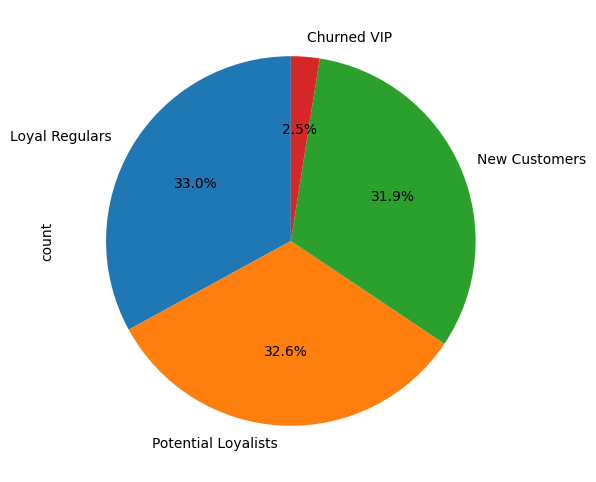

In [384]:
RFM["Segment"].value_counts().plot.pie(
    autopct="%.1f%%", 
    figsize=(6, 6), 
    startangle=90, 
)


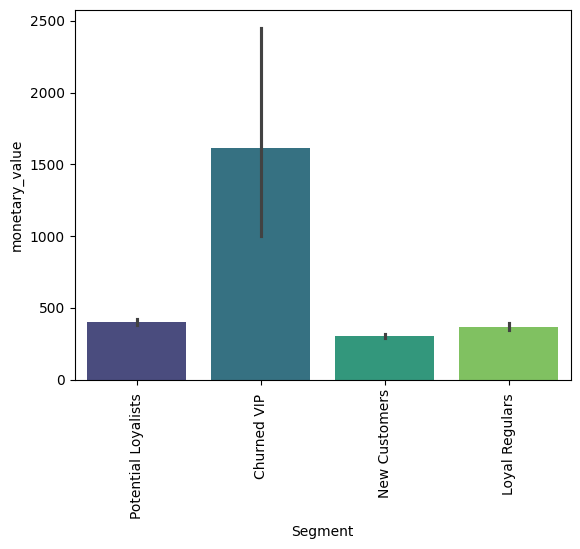

In [385]:
sns.barplot(data=RFM,x='Segment',y='monetary_value',estimator=np.mean,palette="viridis")
plt.xticks(rotation=90)
plt.show()

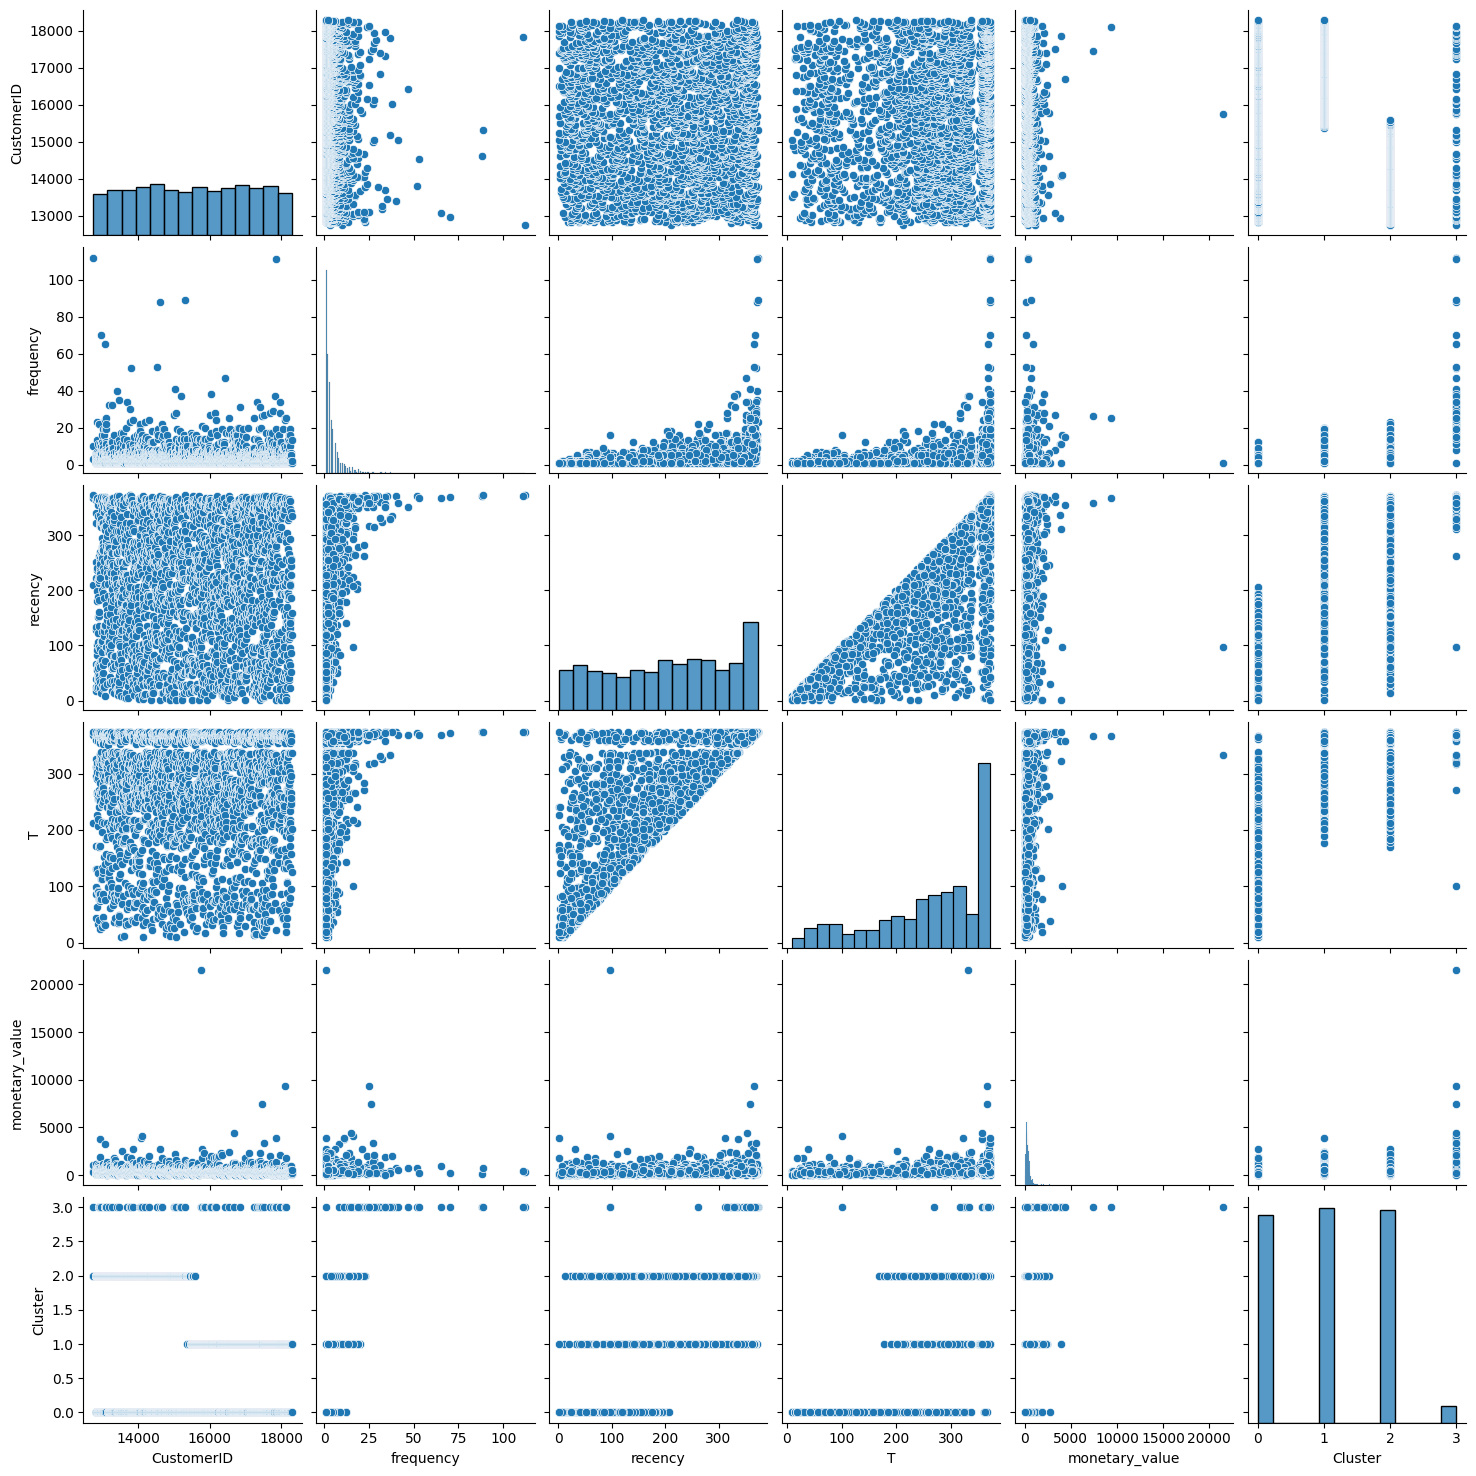

In [386]:
sns.pairplot(RFM)